# Global Covid-19 Data Analysis

In [1]:
# Key Questions to ask when analysing this data set
# Questions to ask for Q1
# Population density vs Total infections? (linear regression) 
# GDP/Poverty vs death rate, # Poverty vs infection rate 
# Random sample of HDI vs total cases and death rate



In [2]:
# Importing the relevant dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import matplotlib
import datetime

# To Display all the columns in the DataFrame
pd.options.display.max_columns=None

# Creating a timestamp to plot in the graphs
current_time = datetime.datetime.now()

In [3]:
# Opening the file and creating a DataFrame
raw_covid_19_data = pd.read_csv('..\Resources\owid-covid-data.csv')
raw_covid_19_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,18.733,18.733,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,37.465,18.733,2.676,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47111,NaN,NaN,International,2020-09-26,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47112,NaN,NaN,International,2020-09-27,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47113,NaN,NaN,International,2020-09-28,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47114,NaN,NaN,International,2020-09-29,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Substituting NaN data with a zero integer
raw_covid_19_data = raw_covid_19_data.fillna(0)
raw_covid_19_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,0.000,0.0,0.0,0.0,18.733,18.733,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
1,ABW,North America,Aruba,2020-03-19,0.0,0.0,0.286,0.0,0.0,0.0,0.000,0.000,2.676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,37.465,18.733,2.676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
3,ABW,North America,Aruba,2020-03-21,0.0,0.0,0.286,0.0,0.0,0.0,0.000,0.000,2.676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
4,ABW,North America,Aruba,2020-03-22,0.0,0.0,0.286,0.0,0.0,0.0,0.000,0.000,2.676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47111,0,0,International,2020-09-26,696.0,0.0,0.000,7.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
47112,0,0,International,2020-09-27,696.0,0.0,0.000,7.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
47113,0,0,International,2020-09-28,696.0,0.0,0.000,7.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
47114,0,0,International,2020-09-29,696.0,0.0,0.000,7.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0


# Corrolation between population density and total cases

In [5]:
# Data Cleanup to Answer first question
# Determining columns
raw_covid_19_data.columns

Index([&#39;iso_code&#39;, &#39;continent&#39;, &#39;location&#39;, &#39;date&#39;, &#39;total_cases&#39;, &#39;new_cases&#39;,
       &#39;new_cases_smoothed&#39;, &#39;total_deaths&#39;, &#39;new_deaths&#39;,
       &#39;new_deaths_smoothed&#39;, &#39;total_cases_per_million&#39;,
       &#39;new_cases_per_million&#39;, &#39;new_cases_smoothed_per_million&#39;,
       &#39;total_deaths_per_million&#39;, &#39;new_deaths_per_million&#39;,
       &#39;new_deaths_smoothed_per_million&#39;, &#39;new_tests&#39;, &#39;total_tests&#39;,
       &#39;total_tests_per_thousand&#39;, &#39;new_tests_per_thousand&#39;,
       &#39;new_tests_smoothed&#39;, &#39;new_tests_smoothed_per_thousand&#39;,
       &#39;tests_per_case&#39;, &#39;positive_rate&#39;, &#39;tests_units&#39;, &#39;stringency_index&#39;,
       &#39;population&#39;, &#39;population_density&#39;, &#39;median_age&#39;, &#39;aged_65_older&#39;,
       &#39;aged_70_older&#39;, &#39;gdp_per_capita&#39;, &#39;extreme_poverty&#39;,
      

In [6]:
# ## Removing unnecessary columns
pop_density_cases = raw_covid_19_data.drop(columns=['iso_code','new_cases','new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index','continent'])



In [7]:
# Determining the number of Unique Countries
pop_density_cases['location'].unique()

array([&#39;Aruba&#39;, &#39;Afghanistan&#39;, &#39;Angola&#39;, &#39;Anguilla&#39;, &#39;Albania&#39;, &#39;Andorra&#39;,
       &#39;United Arab Emirates&#39;, &#39;Argentina&#39;, &#39;Armenia&#39;,
       &#39;Antigua and Barbuda&#39;, &#39;Australia&#39;, &#39;Austria&#39;, &#39;Azerbaijan&#39;,
       &#39;Burundi&#39;, &#39;Belgium&#39;, &#39;Benin&#39;, &#39;Bonaire Sint Eustatius and Saba&#39;,
       &#39;Burkina Faso&#39;, &#39;Bangladesh&#39;, &#39;Bulgaria&#39;, &#39;Bahrain&#39;, &#39;Bahamas&#39;,
       &#39;Bosnia and Herzegovina&#39;, &#39;Belarus&#39;, &#39;Belize&#39;, &#39;Bermuda&#39;,
       &#39;Bolivia&#39;, &#39;Brazil&#39;, &#39;Barbados&#39;, &#39;Brunei&#39;, &#39;Bhutan&#39;, &#39;Botswana&#39;,
       &#39;Central African Republic&#39;, &#39;Canada&#39;, &#39;Switzerland&#39;, &#39;Chile&#39;,
       &#39;China&#39;, &quot;Cote d&#39;Ivoire&quot;, &#39;Cameroon&#39;,
       &#39;Democratic Republic of Congo&#39;, &#39;Congo&#39;, &#39;Colombia&#39;, &#39;

In [8]:
# Dropping World and International Data from this frame
pop_density_cases = pop_density_cases[(pop_density_cases['location']!='International') & (pop_density_cases['location']!='World')]
pop_density_cases

,location,date,total_cases,population_density
0,Aruba,2020-03-13,2.0,584.800
1,Aruba,2020-03-19,0.0,584.800
2,Aruba,2020-03-20,4.0,584.800
3,Aruba,2020-03-21,0.0,584.800
4,Aruba,2020-03-22,0.0,584.800
...,...,...,...,...
46561,Zimbabwe,2020-09-26,7787.0,42.729
46562,Zimbabwe,2020-09-27,7803.0,42.729
46563,Zimbabwe,2020-09-28,7812.0,42.729
46564,Zimbabwe,2020-09-29,7816.0,42.729


In [13]:
# Filtering out the data to determine the latest reported number of cases in each country
pop_density_cases = pop_density_cases.drop_duplicates('location',keep='last').reset_index(drop=True)
pop_density_cases = pop_density_cases.drop(columns=['location','date'])
pop_density_cases

,total_cases,population_density
0,13.0,0.000
1,766.0,0.000
2,106.0,0.000
3,3.0,0.000
4,12.0,0.000
...,...,...
205,70422.0,1935.907
206,391.0,3457.100
207,0.0,7039.714
208,57742.0,7915.731


In [28]:
# Determine if there are outliers
## Population Density
pop_density = pop_density_cases['population_density']
pop_quartile = pop_density.quantile([0.25,0.5,0.75])
pop_q1 = pop_quartile[0.25]
pop_q3 = pop_quartile[0.75]
pop_IQR = pop_q3 - pop_q1

pop_lower_bound = pop_q1 - (pop_IQR * 1.5)
pop_upper_bound = pop_q3 + (pop_IQR * 1.5)

pop_outliers = pop_density.loc[(pop_density<pop_lower_bound)|(pop_density>pop_upper_bound)]

print(f'Outliers for Population Density are\n\n {[p for p in pop_outliers]}')




Outliers for Population Density are

 [494.869, 508.54400000000004, 527.967, 556.6669999999999, 584.8, 594.561, 622.962, 664.4630000000001, 778.202, 1209.088, 1265.036, 1308.82, 1454.037, 1454.433, 1935.9070000000002, 3457.1, 7039.714, 7915.731, 19347.5]


0      False
1      False
2      False
3      False
4      False
       ...  
205    False
206    False
207    False
208    False
209    False
Name: population_density, Length: 210, dtype: bool


In [29]:
# Removing outliers from the data frame
cleaned_pop_density_cases = pop_density_cases[(pop_density_cases['population_density']>pop_lower_bound)&(pop_density_cases['population_density']<pop_upper_bound)]

cleaned_pop_density_cases

,total_cases,population_density
0,13.0,0.000
1,766.0,0.000
2,106.0,0.000
3,3.0,0.000
4,12.0,0.000
...,...,...
186,8740.0,398.448
187,236926.0,402.606
188,506.0,423.062
189,479.0,437.352


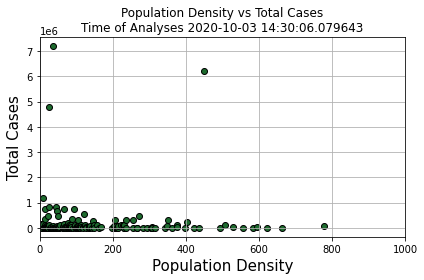

In [40]:
# Scatter Plot
x_value_pop_den = pop_density_cases['population_density']
y_value_pop_den = pop_density_cases['total_cases']

fig1, ax1 = plt.subplots()
ax1.set_title(f'Population Density vs Total Cases\nTime of Analyses {current_time}')
ax1.set_ylabel('Total Cases', fontsize = 15)
ax1.set_xlabel('Population Density', fontsize=15)
ax1.set_xlim(xmin=0,xmax=1000)
ax1.scatter(x_value_pop_den,y_value_pop_den,edgecolors='black', c='#1d6b2e')
ax1.grid(True)

fig1.tight_layout()
plt.savefig('..\Images\Population_density_vs_Total_cases.png')
plt.show()